In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sys import stdout
from sklearn.model_selection import train_test_split
import math
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
plt.style.use('ggplot')
%matplotlib inline

data = pd.read_csv('C:/Users/User/Desktop/train.csv', na_values='?')
data.head(8143)
#data.shape



,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,0,02.02.2015,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,1,02.02.2015,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,2,02.02.2015,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,3,02.02.2015,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,4,02.02.2015,23.754000,26.200000,488.600000,779.000000,0.004767,1
5,5,02.02.2015,23.760000,26.260000,568.666667,790.000000,0.004779,1
6,6,02.02.2015,23.730000,26.290000,536.333333,798.000000,0.004776,1
7,7,02.02.2015,23.754000,26.290000,509.000000,797.000000,0.004783,1
8,8,02.02.2015,23.754000,26.350000,476.000000,803.200000,0.004794,1
9,9,02.02.2015,23.736000,26.390000,510.000000,809.000000,0.004796,1


In [3]:
data.describe()


,id,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,12336.000000,12336.000000,12336.000000,12336.000000,12336.000000,12336.000000,12336.000000
mean,6167.500000,20.923255,25.691374,140.213797,637.221990,0.003936,0.248865
std,3561.240795,1.140085,4.749685,213.197905,298.603692,0.000776,0.432373
min,0.000000,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,3083.750000,20.200000,22.290000,0.000000,443.000000,0.003342,0.000000
50%,6167.500000,20.700000,25.600000,0.000000,476.928571,0.003839,0.000000
75%,9251.250000,21.700000,28.500000,412.200000,763.687500,0.004420,0.000000
max,12335.000000,24.408333,39.117500,1697.250000,2028.500000,0.006476,1.000000


Видно, что все фичи - числовые, кроме даты и нет пропущенных значений, так как везде число всех фич = 8143 

In [4]:
data.corr()['Occupancy'].abs().sort_values(ascending=False)


Occupancy        1.000000
Light            0.908617
CO2              0.711089
Temperature      0.524851
HumidityRatio    0.383737
Humidity         0.188871
id               0.136406
Name: Occupancy, dtype: float64

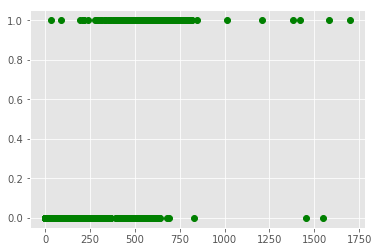

In [5]:

plt.plot(data['Light'], data['Occupancy'], 'go')


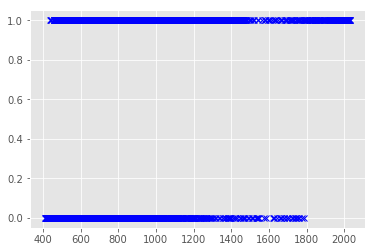

In [6]:
plt.plot(data['CO2'], data['Occupancy'], 'bx')


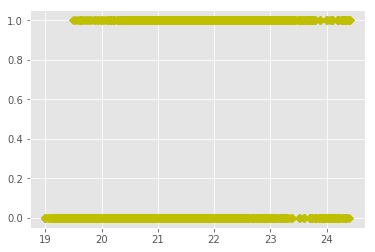

In [7]:
plt.plot(data['Temperature'], data['Occupancy'], 'yD')


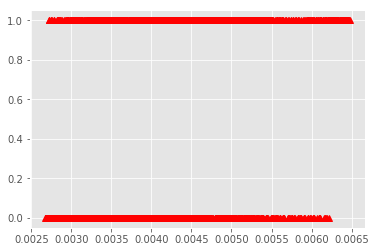

In [8]:
plt.plot(data['HumidityRatio'], data['Occupancy'], 'r^')

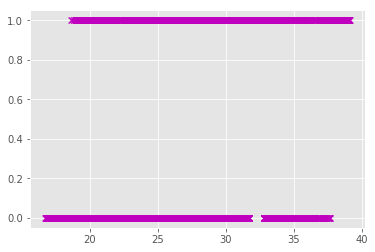

In [9]:
plt.plot(data['Humidity'], data['Occupancy'], 'mx')

In [10]:
# используем предварительно отобранные признаки
cols_x = ['Temperature', 'Light', 'CO2', 'Humidity', 'HumidityRatio']   
# целевой признак
col_y = 'Occupancy'
#разделение данных
X_train, X_test, y_train, y_test = train_test_split(data[cols_x], data[col_y], test_size = 0.35, random_state = 11)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)


8018 4318


# Реализация библиотечной регрессии и проверка точности результатов


In [11]:
#Библиотечная регрессия 
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Mean absolute error by sklearn = ', mean_absolute_error(y_test, lr.predict(X_test)))

def rmsle(y_true, y_pred):
   assert len(y_true) == len(y_pred)
   return np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean() ** 0.5

print('Root mean squared error by sklearn =', rmsle(y_test, lr.predict(X_test)))
print('Accuracy score =', accuracy_score(y_test, lr.predict(X_test)))

Mean absolute error by sklearn =  0.01157943492357573
Root mean squared error by sklearn = 0.07458803126843898
Accuracy score = 0.9884205650764243


# Реализация логистической регрессии руками

In [12]:
#Функция для сигмоиды:
def sigmoid(res):
    return 1 / (1 + np.exp(-res))

In [13]:
class MyLogisticRegression:
    def __init__(self, steps, alpha, add_intercept = True, decreasing_alpha = False):
        self.steps = steps
        self.alpha = alpha
        self.add_intercept = add_intercept
        self.decreasing_alpha = decreasing_alpha
        
    def fit(self, X, y):
        if self.add_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.hstack((intercept, X))

        self.weights = np.random.uniform(-30000,10000,X.shape[1])
        print(self.weights)

        for step in range(self.steps):
            scores = np.dot(X, self.weights)
            predictions = sigmoid(scores)

            error = y - predictions
            gradient = np.dot(X.T, error)
            
            if self.decreasing_alpha:
                self.weights += self.alpha/sqrt(step+1) * gradient
            else:
                self.weights += self.alpha * gradient
    
    def predict_binary(self, X):
        if self.add_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.hstack((intercept, X))
            
        res =  np.sign(np.dot(X, self.weights))   
        np.place(res, res < 0, 0)
        return res
    
    def predict(self, X):
        if self.add_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.hstack((intercept, X))
        return sigmoid(np.dot(X, self.weights))

In [14]:
my_lr = MyLogisticRegression(50000, 0.003)
my_lr.fit(X_train, y_train)

[  -746.47089312 -15819.82768256 -21492.57112192  -8952.49611663
 -23620.32008038 -11402.02545487]


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
my_predict = my_lr.predict_binary(X_test)

print('Mean absolute error by hands = ', mean_absolute_error(y_test, my_predict))
print('Root mean squared error by hands =', rmsle(y_test, my_predict))
print('Accuracy score by hands =', accuracy_score(y_test, my_predict))

Mean absolute error by hands =  0.05048633626679018
Root mean squared error by hands = 0.15574438166774182
Accuracy score by hands = 0.9495136637332098
